In [2]:
#!/Tsan/bin/python
# -*- coding: utf-8 -*-

In [3]:
# Libraries To Use
from __future__ import division 
from CloudQuant import MiniSimulator 
import numpy as np
import pandas as pd
import statsmodels.api as sm
import scipy.stats
import os
from sklearn import linear_model
from datetime import datetime,time,date
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# Import My own library for factor testing
import factorFilterFunctions as ff
#from config import *

In [5]:
%matplotlib inline

In [6]:
path_name = 'D:/cStrategy/BackTestResult/8bf8cdf8380d4030b26df2c9a46a88d1/'
path = ff.data_path

In [7]:
filename = 'dealList.csv'
filenameHS300 = 'LZ_GPA_INDXQUOTE_CLOSE.csv'

In [8]:
benchMarkIndex = '000905.SH'
HS300Index ='000300.SH' # HS300 index code
ZZ500Index = '000905.SH' #   ZZ500 index code

In [9]:
benchMarkData = pd.read_csv(path+filenameHS300,infer_datetime_format=True,parse_dates=[0],index_col=0)[benchMarkIndex]

In [10]:
benchMarkMonthly = benchMarkData.resample('M').last()

In [11]:
inforDF = pd.read_csv(path_name+filename,infer_datetime_format=True,parse_dates=[0])
inforDF['TRADE_TIME'] = inforDF['TRADE_TIME'].apply(lambda x: str(x)[:8])
inforDF['TRADE_TIME'] = pd.to_datetime(inforDF['TRADE_TIME'], format='%Y%m%d', errors='ignore')

In [12]:
inforDFBuy = inforDF[inforDF['TRADE_TYPE'] == 1]

In [13]:
BuySeries = inforDFBuy.set_index('TRADE_TIME').resample('M').size()

In [14]:
compareDF = pd.concat([benchMarkMonthly, BuySeries], axis=1, join='inner')
compareDF.rename(columns = {0:'Buy_count'},inplace=True)
#compareDF['Buy_count']

In [15]:
compareDF .head()

,000905.SH,Buy_count
LZ_GPA_INDXQUOTE_CLOSE-d,,
2012-01-31,3294.494,108
2012-02-29,3696.144,109
2012-03-31,3416.856,127
2012-04-30,3664.638,102
2012-05-31,3753.593,0


In [16]:
compareDF['Buy_count'].corr(compareDF[benchMarkIndex],method='spearman')

-0.60120640531769254

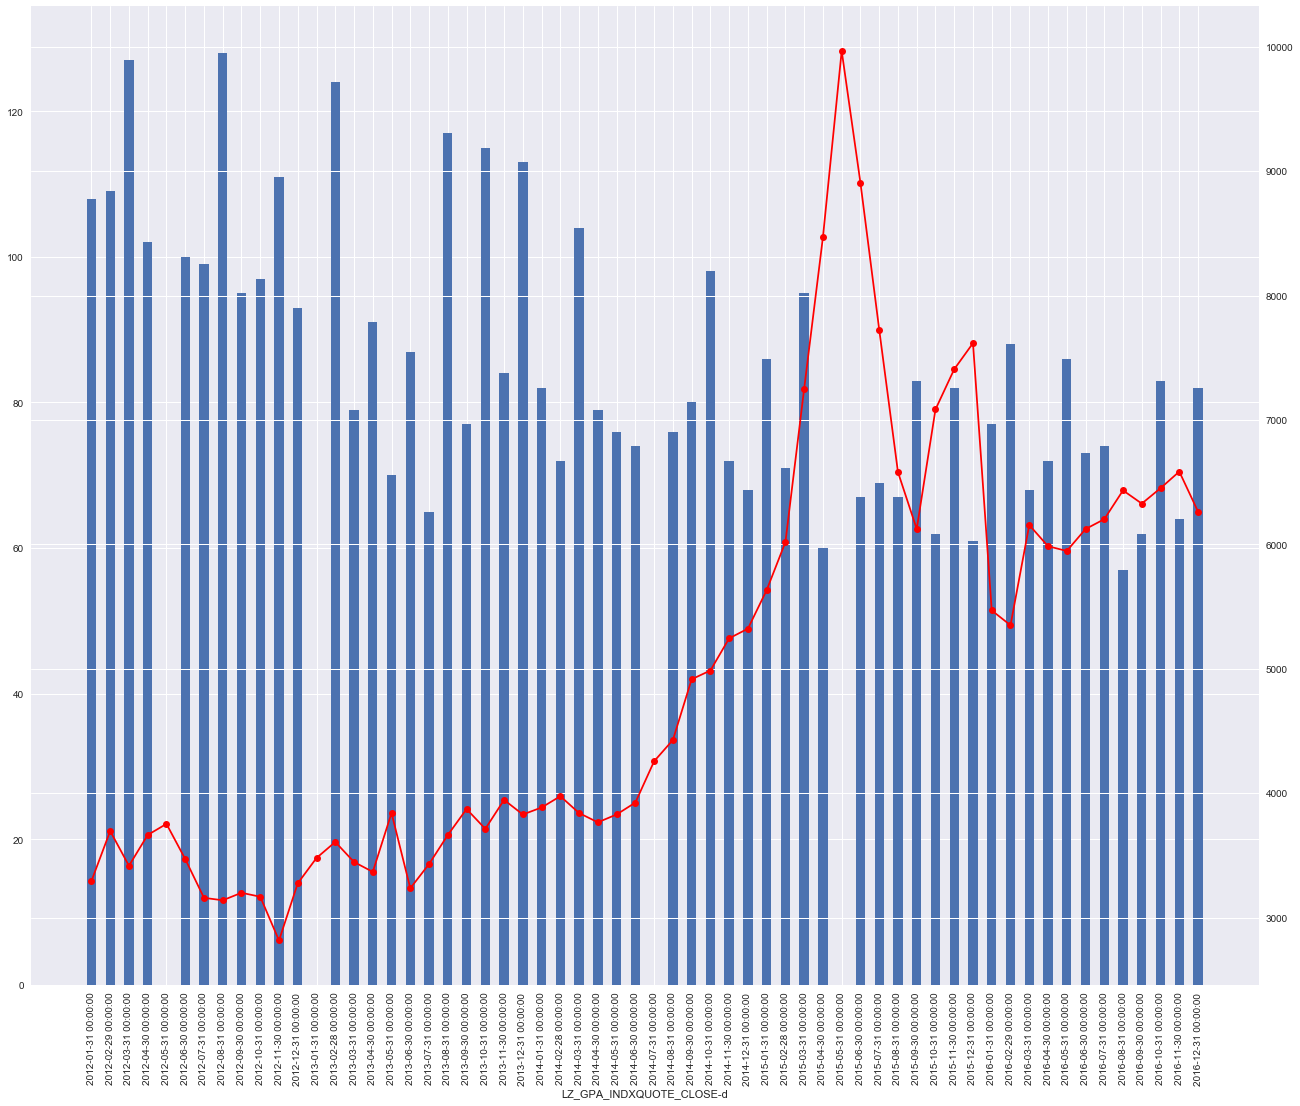

In [17]:
# Plot bar and line in same figure
fig = plt.figure(figsize=(22,18))
ax = compareDF['Buy_count'].plot(kind="bar")
ax2 = ax.twinx()
ax2.plot(ax.get_xticks(),compareDF[benchMarkIndex],marker='o',color ='r')

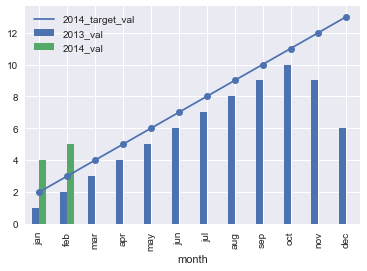

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

left_2013 = pd.DataFrame(
    {'month': ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep',
               'oct', 'nov', 'dec'],
     '2013_val': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 9, 6]})

right_2014 = pd.DataFrame({'month': ['jan', 'feb'], '2014_val': [4, 5]})

right_2014_target = pd.DataFrame(
    {'month': ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep',
               'oct', 'nov', 'dec'],
     '2014_target_val': [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]})

df_13_14 = pd.merge(left_2013, right_2014, how='outer')
df_13_14_target = pd.merge(df_13_14, right_2014_target, how='outer')

ax = df_13_14_target[['month', '2014_target_val']].plot(
    x='month', linestyle='-', marker='o')
df_13_14_target[['month', '2013_val', '2014_val']].plot(x='month', kind='bar',
                                                        ax=ax)

plt.show()

In [19]:
inforDF.set_index('TRADE_TIME').resample('M').last()

,CODE,VOLUME,PRICE,TRADE_TYPE,POSITION_AVG_PRICE,COMMISSION
TRADE_TIME,,,,,,
2012-01-31,600408,114600,4.25,1,4.256375,0.0
2012-02-29,002110,63100,8.15,1,8.162225,0.0
2012-03-31,600475,100,11.85,1,11.900000,0.0
2012-04-30,002011,49000,10.30,1,10.315450,0.0
2012-05-31,601126,32000,15.42,-1,15.483190,0.0
2012-06-30,002011,49100,10.43,1,10.445645,0.0
2012-07-31,000656,49400,10.17,1,10.185255,0.0
2012-08-31,600963,700,3.65,1,3.657143,0.0
2012-09-30,000861,38600,14.28,1,14.301420,0.0
